Drills
Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

1. Choose one variable and plot that variable four different ways.
2. Choose two continuous variables, and plot them three different ways.
3. Choose one continuous variable and one categorical variable, and plot them six different ways.
4. Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

Challenge
<br>
As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

1. Probability distributions
2. Bivariate relationships
3. Whether the distributions or the relationships vary across groups

Accompany your plot with a written description of what you see.

https://www.kaggle.com/abecklas/fifa-world-cup/version/5#

In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv('world_cup_matches.csv')
matches = matches.rename(columns=lambda x: x.strip())
#loads data, cleans whitespace

In [3]:
matches.rename(columns={'Year':'year',
                       'Attendance':'attendance',
                       'Home Team Goals':'home_team_goals',
                       'Away Team Goals':'away_team_goals',
                       'Half-time Home Goals':'half_home_goals',
                       'Half-time Away Goals':'half_away_goals',
                       'Home Team Initials':'home_initials',
                       'Away Team Initials':'away_initials'}, inplace=True)
#renames column

In [4]:
matches.head(8)

,year,Datetime,Stage,Stadium,City,Home Team Name,home_team_goals,away_team_goals,Away Team Name,Win conditions,attendance,half_home_goals,half_away_goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,home_initials,away_initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR


In [5]:
atten = matches['attendance'].dropna()
#drop rows that are NaN

#### Choose one variable and plot that variable four different ways.

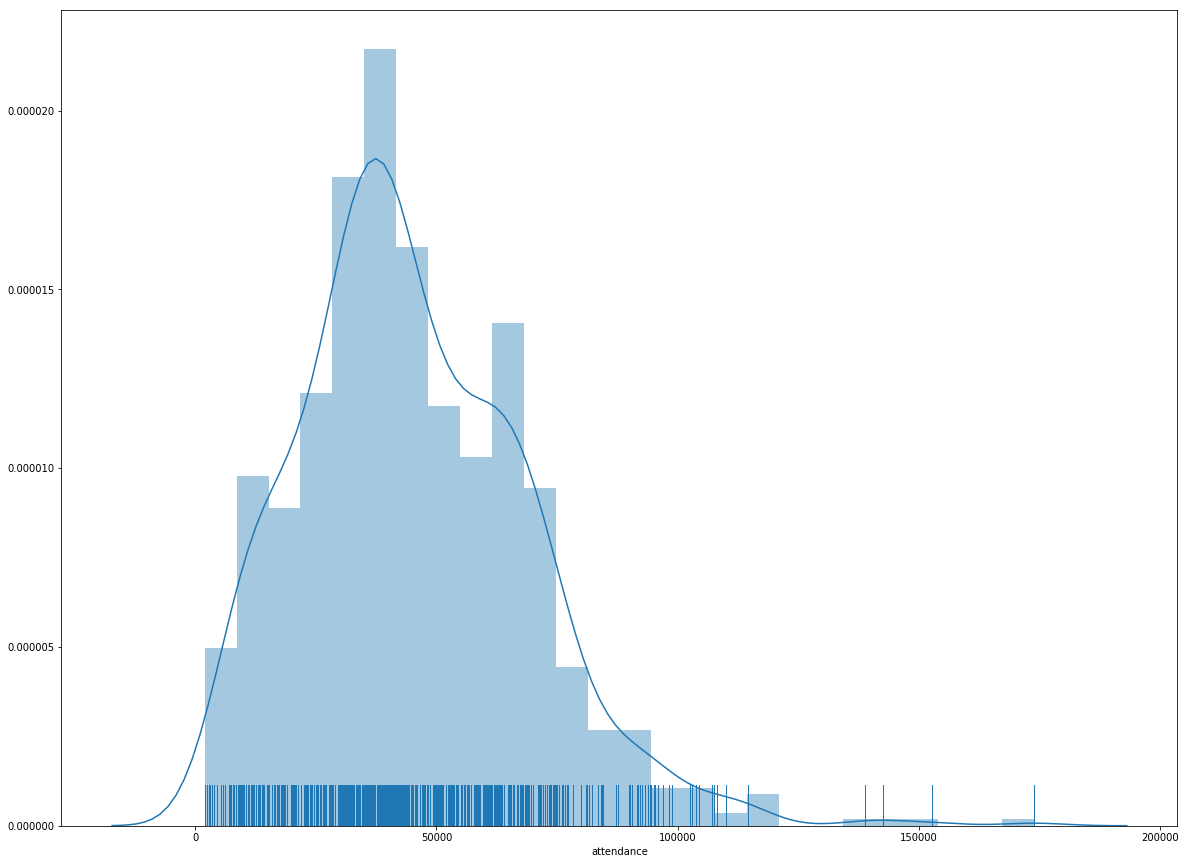

In [6]:
#1-1
fig, ax = plt.subplots(figsize=(20,15))
sns.distplot(atten, ax=ax, rug=True)
#PROS: Delinates variable with 3 visuals in one graph
#CONS: I have no idea why the Y value is so small

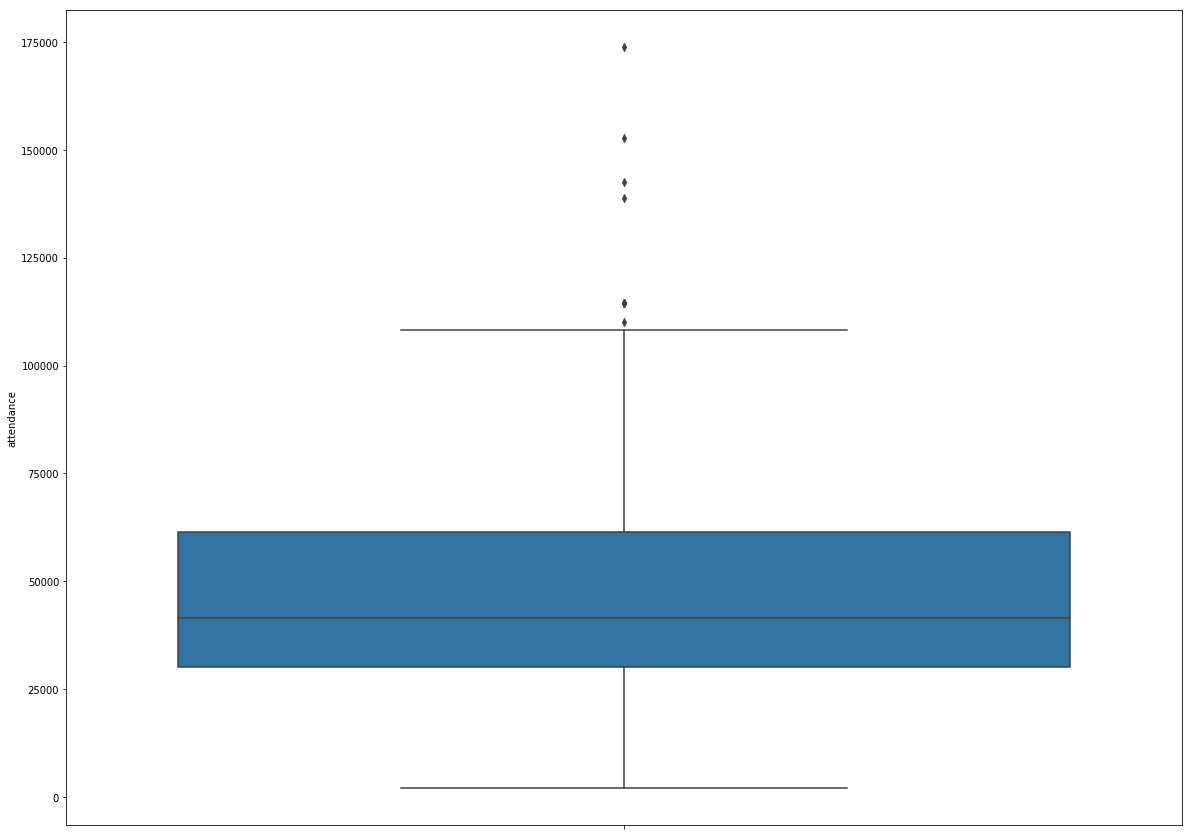

In [7]:
#1-2
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(y=atten, ax=ax)
#PROS: Clearly see the IQR
#CONS: It's just a piece of the puzzle, it needs supporting graphs.

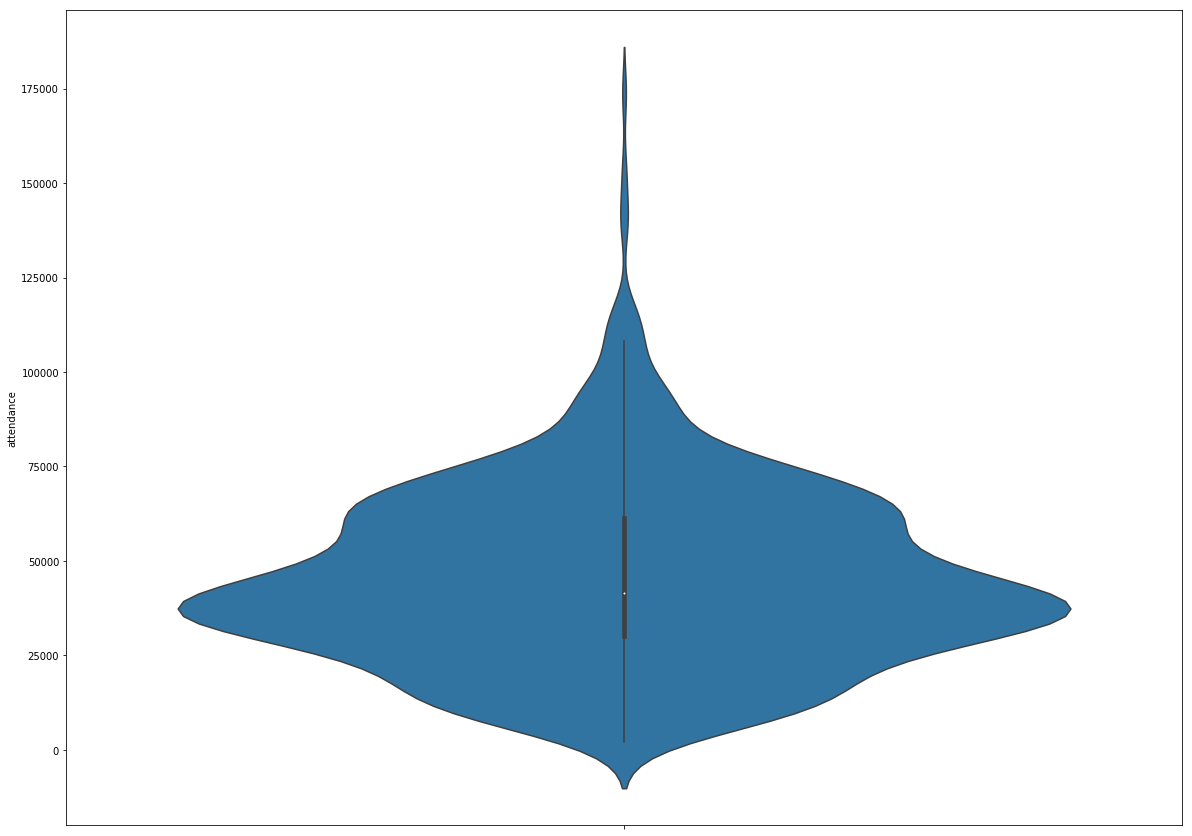

In [8]:
#1-3
fig, ax = plt.subplots(figsize=(20,15))
sns.violinplot(y=atten, ax=ax)
#PROS: More detail in the mode (outline) compared to a box plot. Shows full distribution of the data,
#good for multiple peaks.
#CONS: I think this is meant to have another inner shape to represent the 95th percentile,
#but perhaps it is so small it reads as a line?

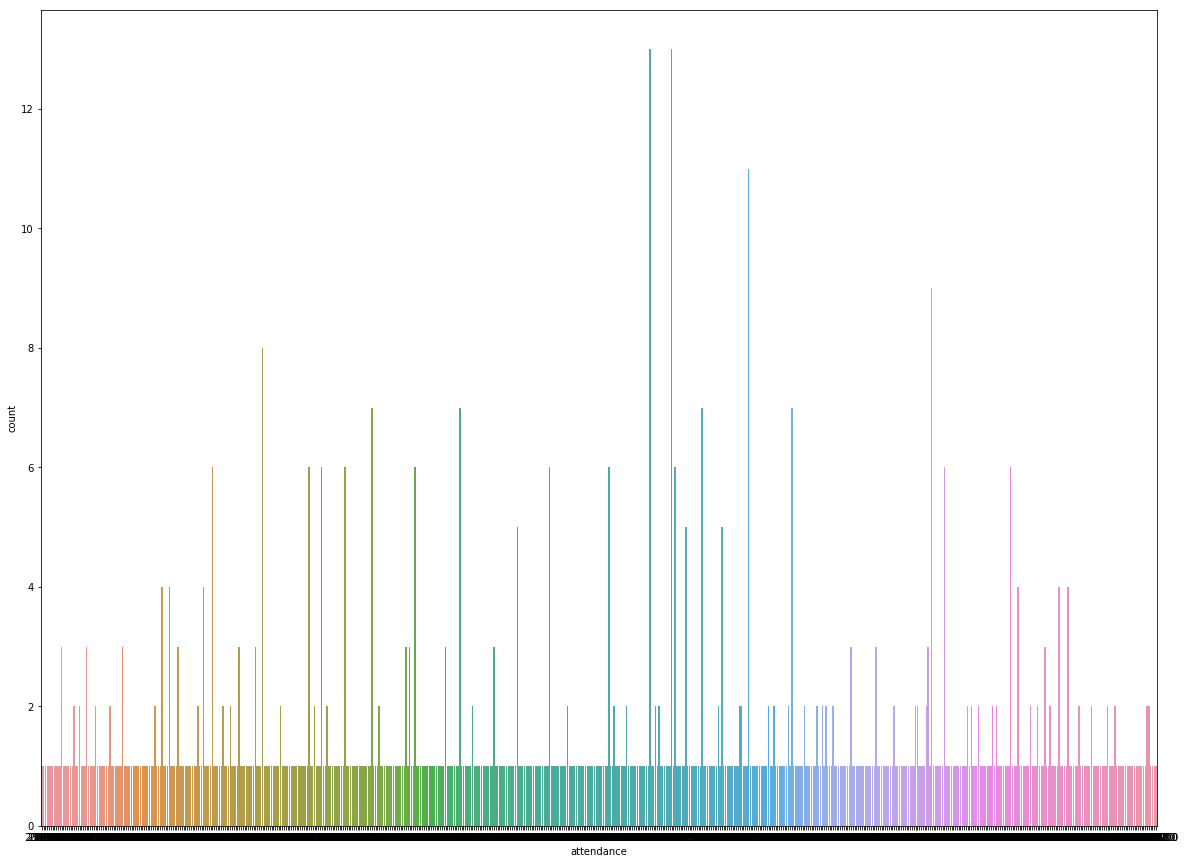

In [9]:
#1-4
fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(atten, ax=ax)
#PROS: The colors and the legibility of the visuals in genreal (excluding x labels in this instance)
#CONS: Probably not the ideal graph for this databecause there are so many entries, the attendance numbers are not legible.
# Also, the count of number of times the attendance hit the same exact amount of people is not very valuabe information.

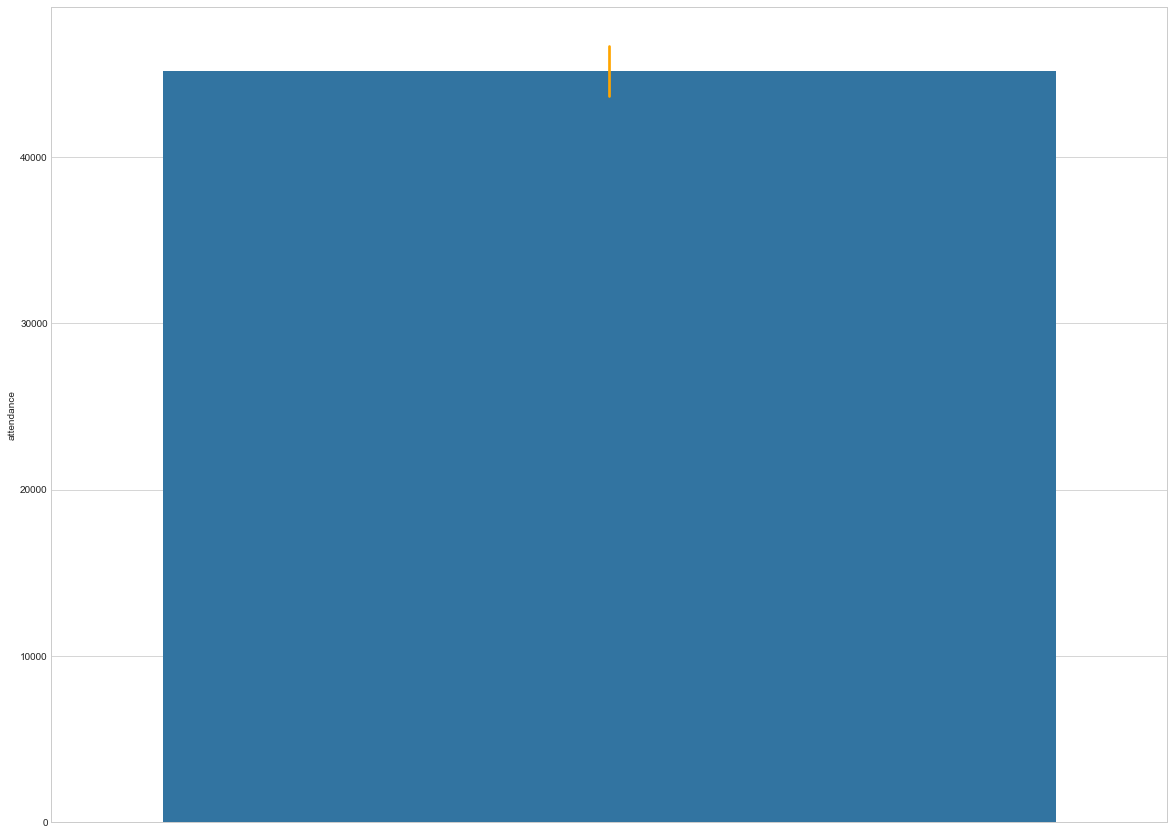

In [10]:
#1-5
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20,15))
sns.barplot(y=atten, errcolor='orange', ax=ax)
#PROS: Very clear representation of mean (ehight of bar) and standard deviation (line in top)
#CONS: Not that much information given, really. In this case, I would want smaller increments for the Y axis

In [11]:
goals = matches.filter(['home_team_goals','away_team_goals'], axis=1)
#filters to just the two columns we are comparing

#### Choose two continuous variables, and plot them three different ways.

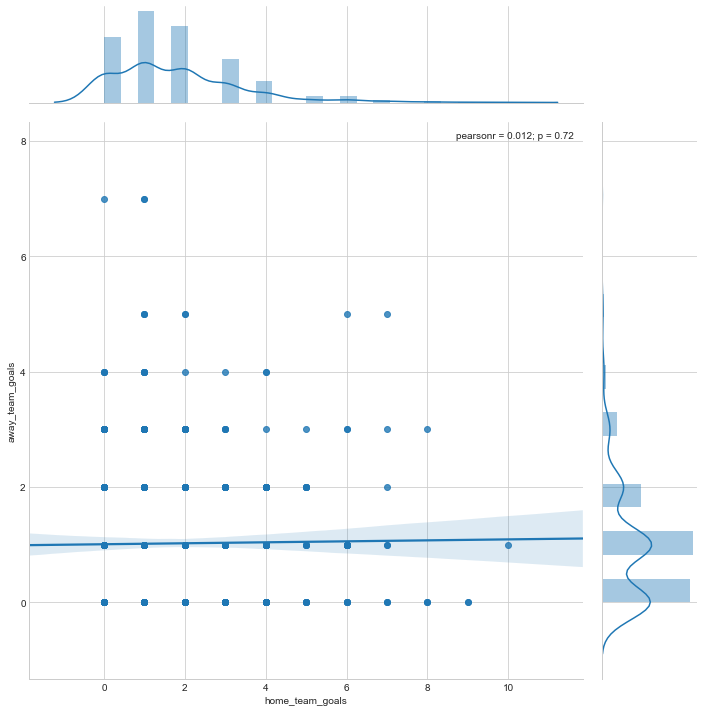

In [12]:
#2-1a
sns.jointplot(matches['home_team_goals'], matches['away_team_goals'], kind='reg', size=10)

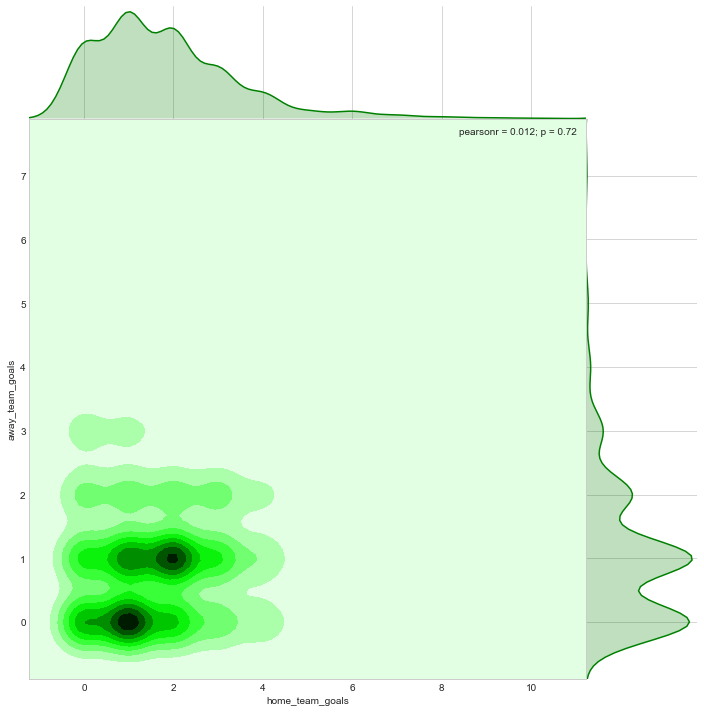

In [13]:
#2-1b
g = sns.jointplot('home_team_goals', 'away_team_goals', data=matches, kind='kde', space=0, color='g', size=10)

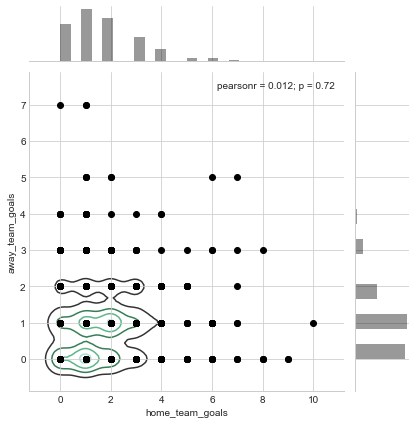

In [14]:
#2-1c
g = (sns.jointplot('home_team_goals',
                   'away_team_goals',
                    data=goals, color="k")
                    .plot_joint(sns.kdeplot, zorder=0, n_levels=4))

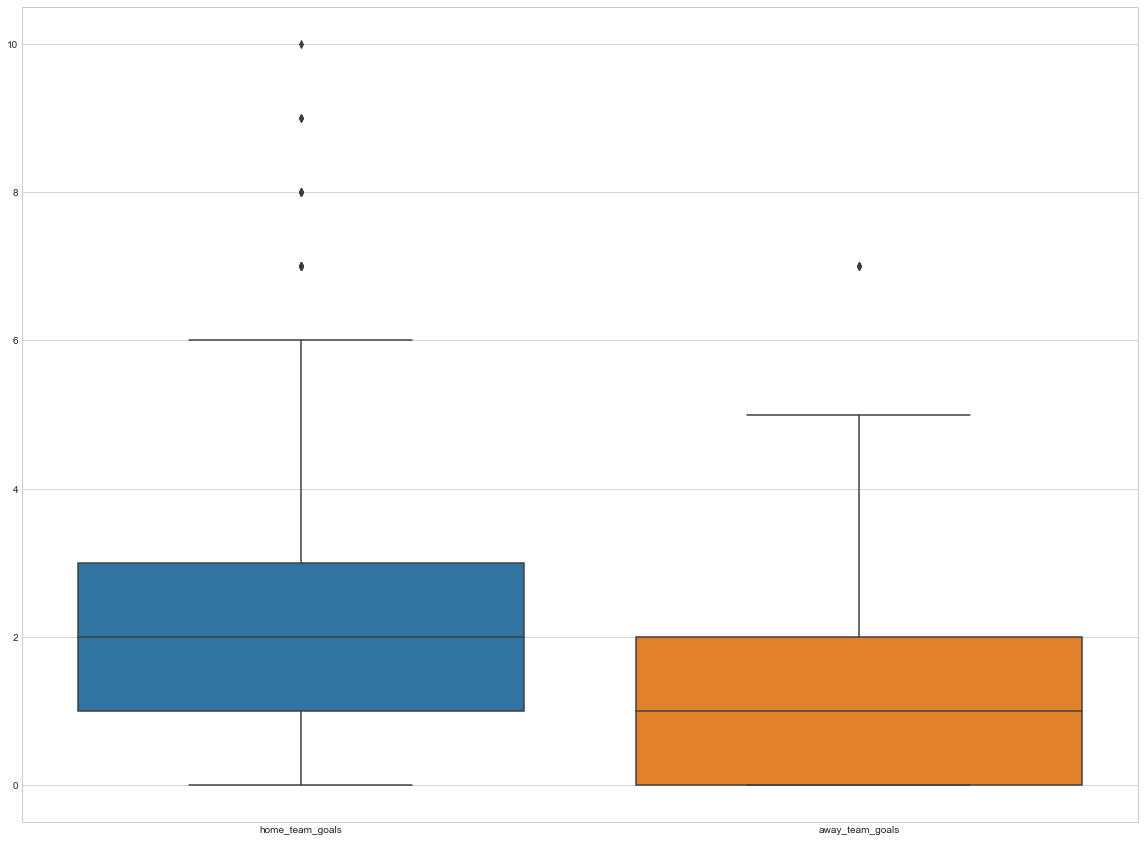

In [15]:
#2-2
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=goals)

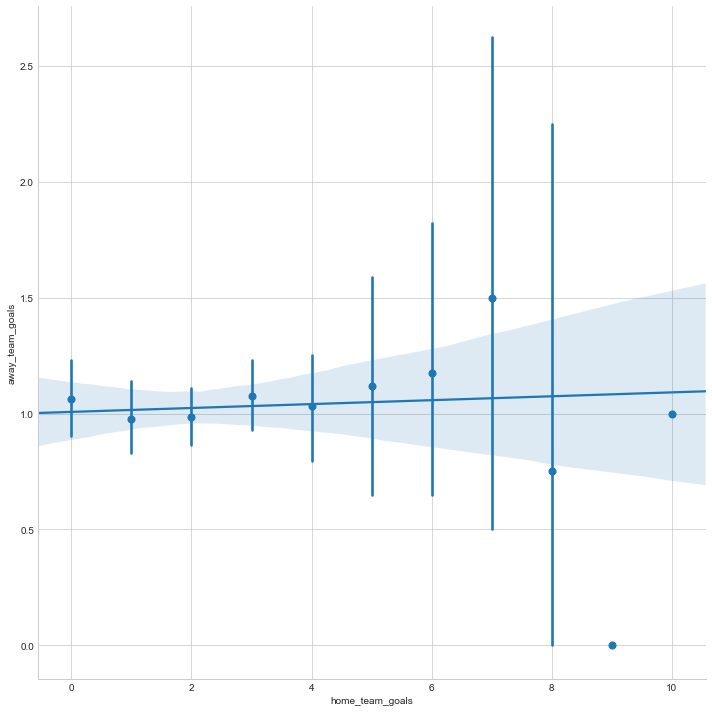

In [16]:
#2-3
sns.lmplot(x='home_team_goals', y='away_team_goals', data=goals, x_estimator=np.mean, size=10);

#### Choose one continuous variable and one categorical variable, and plot them six different ways.

In [17]:
matches.head(8)

,year,Datetime,Stage,Stadium,City,Home Team Name,home_team_goals,away_team_goals,Away Team Name,Win conditions,attendance,half_home_goals,half_away_goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,home_initials,away_initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR


In [18]:
home_team = matches.filter(['home_team_goals','home_initials'], axis=1)

In [19]:
home_team = home_team.dropna(thresh=2)

In [20]:
goals = matches.filter(['home_initials',
                        'home_team_goals',
                        'half_home_goals',
                        'away_initials',
                        'away_team_goals',
                        'half_away_goals'], axis=1)

In [21]:
goals = goals[pd.notnull(goals['home_initials'])]
#This selects only the not null entreis from home_initials to 'goals',
#in this case effectively filtering out all of the NaN from other coluns as well!

In [22]:
goals

,home_initials,home_team_goals,half_home_goals,away_initials,away_team_goals,half_away_goals
0,FRA,4.0,3.0,MEX,1.0,0.0
1,USA,3.0,2.0,BEL,0.0,0.0
2,YUG,2.0,2.0,BRA,1.0,0.0
3,ROU,3.0,1.0,PER,1.0,0.0
4,ARG,1.0,0.0,FRA,0.0,0.0
5,CHI,3.0,1.0,MEX,0.0,0.0
6,YUG,4.0,0.0,BOL,0.0,0.0
7,USA,3.0,2.0,PAR,0.0,0.0
8,URU,1.0,0.0,PER,0.0,0.0
9,CHI,1.0,0.0,FRA,0.0,0.0


In [23]:
goals.isnull().values.any()
#Check if there are NaN thoughout the df; there are no longer any! See this df used in #3-5 and #3-6

False

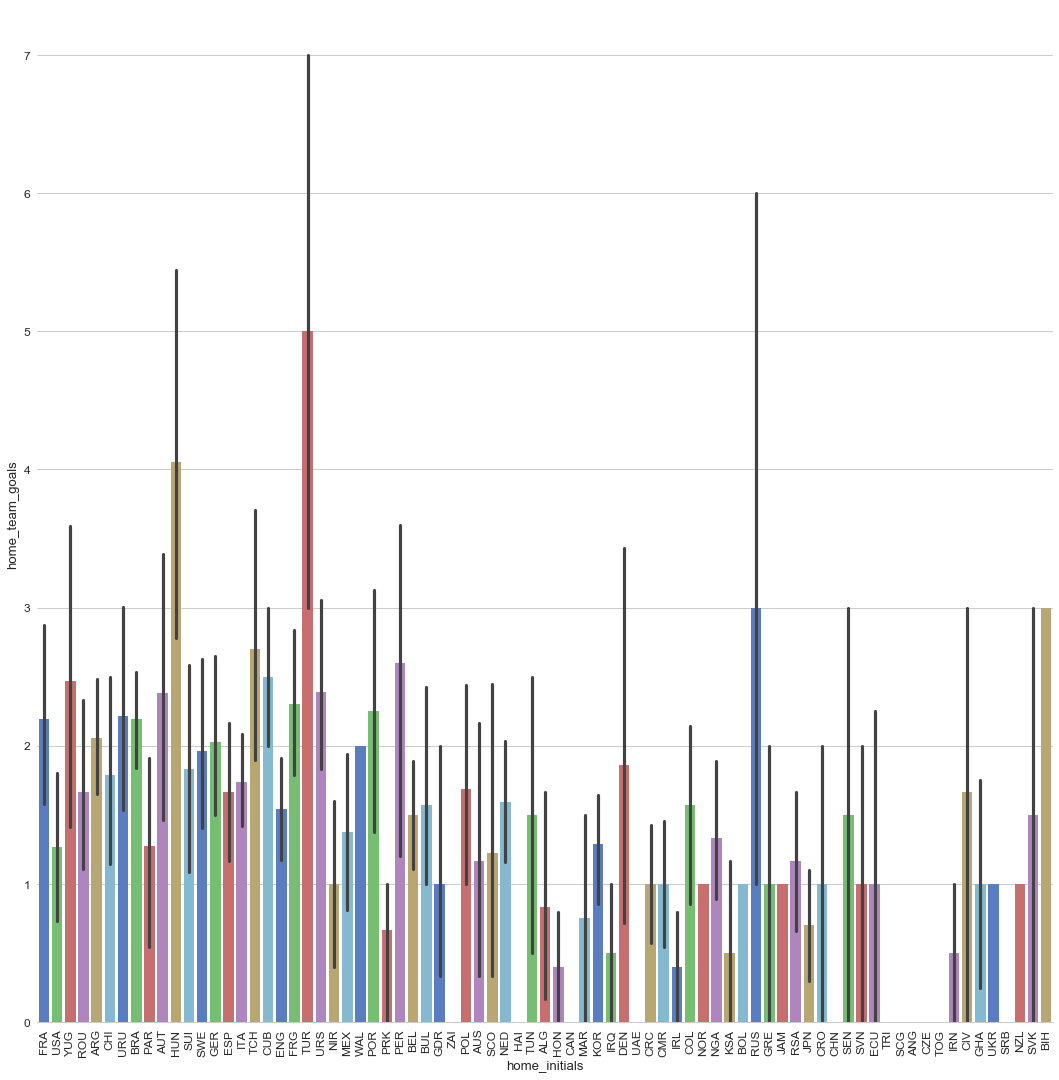

In [24]:
#3-1
sns.set(style='whitegrid', font_scale=1.2)

g = sns.factorplot(x='home_initials', y='home_team_goals', data=home_team, size=15, kind='bar', palette='muted')

g.set_xticklabels(rotation=90)
g.despine(left=True)
g.set_ylabels('home_team_goals')

In [25]:
home_50 = home_team[:50]

In [26]:
home_50

,home_team_goals,home_initials
0,4.0,FRA
1,3.0,USA
2,2.0,YUG
3,3.0,ROU
4,1.0,ARG
5,3.0,CHI
6,4.0,YUG
7,3.0,USA
8,1.0,URU
9,1.0,CHI


In [27]:
home_50_sort = home_50.groupby(['home_initials']).mean()

In [28]:
home_50_sort = home_50.sort_values(by=['home_team_goals'])

In [29]:
home_50_sort

,home_team_goals,home_initials
9,1.0,CHI
44,1.0,BRA
30,1.0,ITA
31,1.0,ITA
12,1.0,PAR
8,1.0,URU
28,1.0,ITA
4,1.0,ARG
35,1.0,SUI
34,2.0,ITA


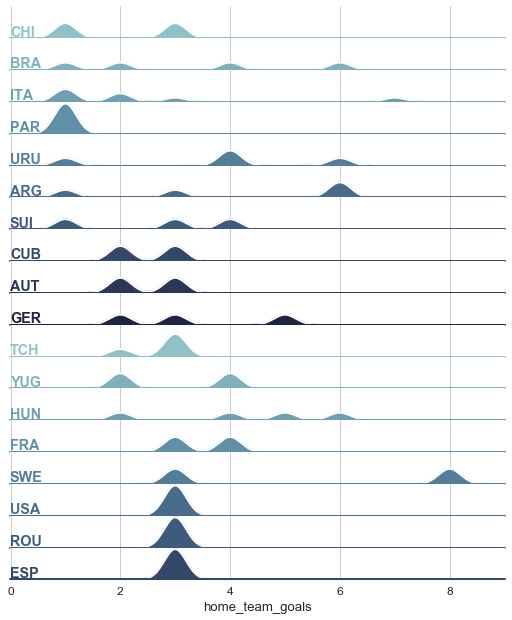

In [30]:
#3-2
# Palette
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(home_50_sort, row='home_initials', hue='home_initials', aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'home_team_goals', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'home_team_goals', clip_on=False, color='w', lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color=color, 
            ha='left', va='center', transform=ax.transAxes)

g.map(label, 'home_team_goals')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=0)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [31]:
home_5 = home_team[:5]

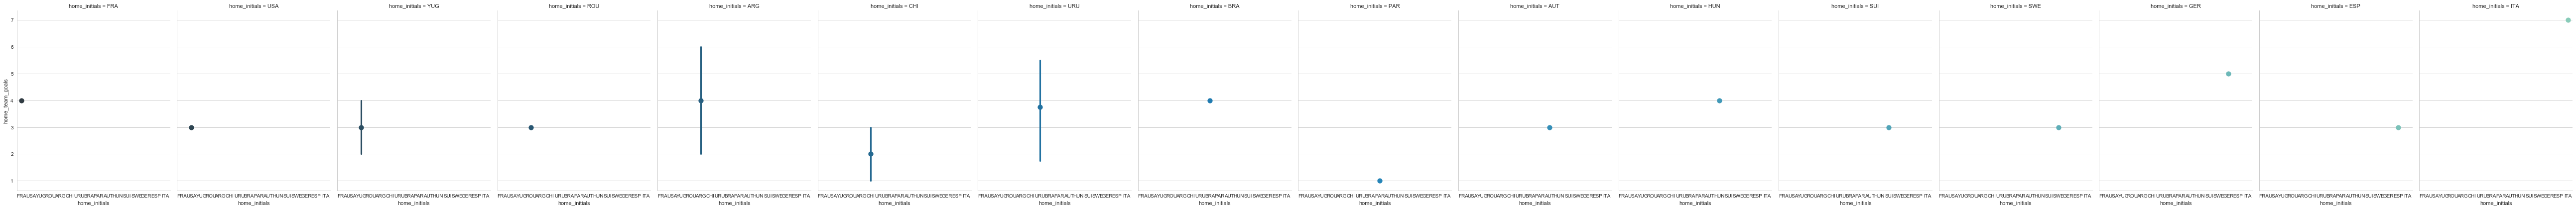

In [32]:
#3-3
sns.set(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.factorplot(x='home_initials', y='home_team_goals',
                   col='home_initials', data=home_50[:25], palette="YlGnBu_d", size=6, aspect=.75)
# g.despine(left=True)


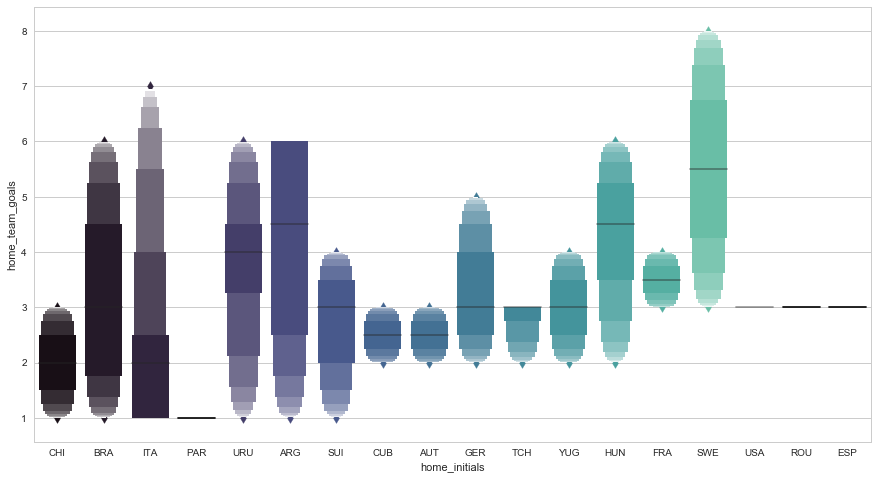

In [33]:
#3-4
sns.set(style="whitegrid")

plt.figure(figsize=(15,8))

sns.lvplot(data=home_50_sort, y='home_team_goals', x='home_initials', scale="linear", palette="mako")

In [38]:
goals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 6 columns):
home_initials      852 non-null object
home_team_goals    852 non-null float64
half_home_goals    852 non-null float64
away_initials      852 non-null object
away_team_goals    852 non-null float64
half_away_goals    852 non-null float64
dtypes: float64(4), object(2)
memory usage: 46.6+ KB


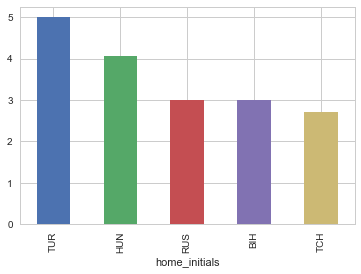

In [80]:
#3-5 part two
goals.groupby('home_initials')['home_team_goals'].mean().sort_values(ascending=False).head().plot(kind='bar')

In [64]:
#3-5 using goals df

sns.set(style="whitegrid")

# "Melt" the dataset to "long-form" or "tidy" representation
goals_melt = pd.melt(goals, 'home_initials')
#                      , var_name='home_team_goals')

In [67]:
goals_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260 entries, 0 to 4259
Data columns (total 3 columns):
home_initials    4260 non-null object
variable         4260 non-null object
value            4260 non-null object
dtypes: object(3)
memory usage: 99.9+ KB


In [52]:
goals_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260 entries, 0 to 4259
Data columns (total 3 columns):
home_initials      4260 non-null object
home_team_goals    4260 non-null object
value              4260 non-null object
dtypes: object(3)
memory usage: 99.9+ KB


In [60]:
goals_melt_clean = goals_melt[goals_melt.value != 'MEX']

In [63]:
goals_melt_clean.value.map(lambda x: float(x))

ValueError: could not convert string to float: 'BEL'

ValueError: Neither the `x` nor `y` variable appears to be numeric.

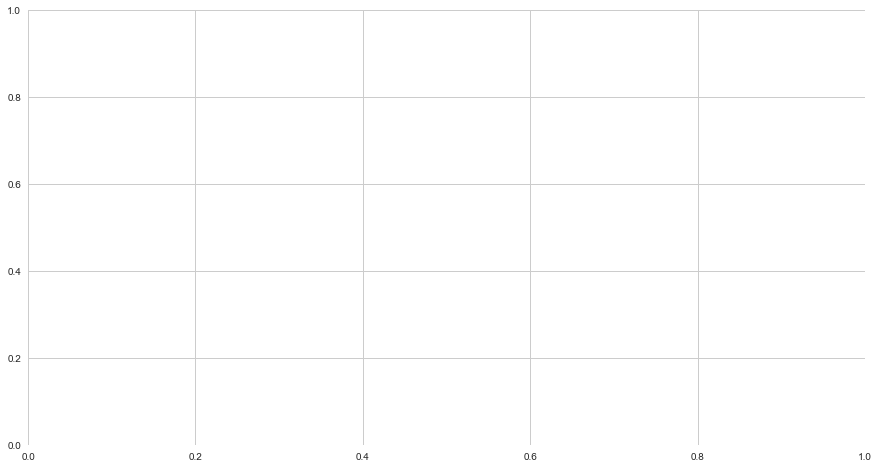

In [50]:
# Initialize the figure, set size
f, ax = plt.subplots(figsize=(15,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(y='home_team_goals', x='value', hue='home_initials',
              data=goals_melt_clean, dodge=True, jitter=True)
#               alpha=.25, zorder=1)

In [ ]:
# Show each observation with a scatterplot
sns.stripplot(y=goals_melt['home_team_goals'], x=goals_melt['home_initials'], hue=goals_melt['home_team_goals'],
              data=goals_melt, dodge=True, jitter=True,
              alpha=.25, zorder=1)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

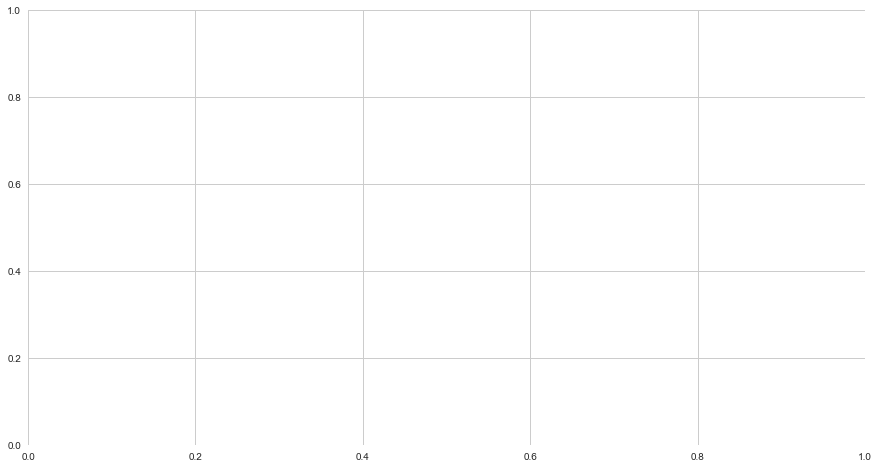

In [45]:
# Show the conditional means
sns.pointplot(y=goals_melt['home_team_goals'], x=goals_melt['home_initials'], hue=goals_melt['home_team_goals'],
              data=goals_melt, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[18:], labels[18:], title="Teams",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

In [ ]:
# HERE I am trying to convert the data entires for home_team_goals into integers using a lambda function.
# It's working now because I removed allthe NaN above
goals['home_team_goals'] = goals['home_team_goals'].apply(lambda x: int(float(x)))

In [ ]:
type(goals['home_team_goals'][1])

In [ ]:
#3-6 using home_5 df
#This needs the goals strings to be int or float, needed from cell above.
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(home_5, annot=True, fmt="d", linewidths=.5, ax=ax)

#### Challenge

In [ ]:
# I don't think this meets the requirement. Is there a plot that does it all already made,
# or do I have to cobble one together?

In [ ]:
sns.pairplot(goals);

In [36]:
sns.set(style="whitegrid")
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

In [37]:
iris

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
5,setosa,sepal_length,5.4
6,setosa,sepal_length,4.6
7,setosa,sepal_length,5.0
8,setosa,sepal_length,4.4
9,setosa,sepal_length,4.9
